# IntersectNet
### Recreation of Intersection Recognition Based on Equirectangular Images

In [1]:
# Imports
from keras import layers, models, losses, optimizers
from keras.preprocessing.image import ImageDataGenerator

import os
import pickle
import matplotlib.pyplot as plt

# Parameters
dataset_width = 150  # dataset image width
dataset_height = 84  # dataset image height

import_model = "intersectNet_0828-1435"

Using TensorFlow backend.


### Generators for Dataset

In [2]:
datagen = ImageDataGenerator(rescale=1./255)

norm_train_generator = datagen.flow_from_directory(
    os.path.join(os.getcwd(), "dataset/normal/train"),
    target_size=(dataset_width, dataset_height),
    batch_size=32,
    class_mode="binary"
)
pano_train_generator = datagen.flow_from_directory(
    os.path.join(os.getcwd(), "dataset/pano/train"),
    target_size=(dataset_width, dataset_height),
    batch_size=32,
    class_mode="binary"
)
norm_validation_generator = datagen.flow_from_directory(
    os.path.join(os.getcwd(), "dataset/normal/validation"),
    target_size=(dataset_width, dataset_height),
    batch_size=32,
    class_mode="binary"
)
pano_validation_generator = datagen.flow_from_directory(
    os.path.join(os.getcwd(), "dataset/pano/validation"),
    target_size=(dataset_width, dataset_height),
    batch_size=32,
    class_mode="binary"
)

Found 5000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Load Trained Model & History
*(Model is trained using the remoteTraining.py script on the GPU Machine)*

In [3]:
norm_model = models.load_model("models/{}/norm.h5".format(import_model))
pano_model = models.load_model("models/{}/pano.h5".format(import_model))
with open("models/{}/norm.hist".format(import_model), "rb") as file:
    norm_history = pickle.load(file)
with open("models/{}/pano.hist".format(import_model), "rb") as file:
    pano_history = pickle.load(file)
print("loaded {}".format(import_model))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
loaded intersectNet_0828-1435


### Plotting Loss & Accuracy

Training Time: 4:07:29.254080(normal) 4:21:41.956664(panorama)


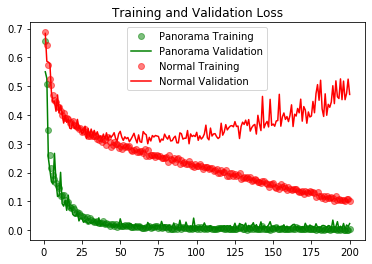

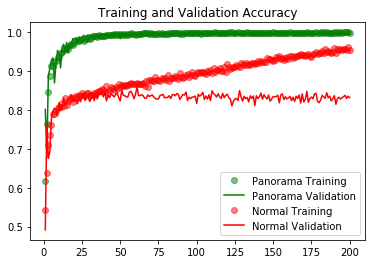

In [5]:
print("Training Time: {}(normal) {}(panorama)".format(norm_history["traintime"], pano_history["traintime"]))

epochs = range(1, len(norm_history["acc"])+1)

plt.plot(epochs, pano_history["loss"], "go", label="Panorama Training", alpha=0.5)
plt.plot(epochs, pano_history["val_loss"], "g", label="Panorama Validation")
plt.plot(epochs, norm_history["loss"], "ro", label="Normal Training", alpha=0.5)
plt.plot(epochs, norm_history["val_loss"], "r", label="Normal Validation")
plt.title("Training and Validation Loss")
plt.legend()

plt.savefig("../docs/notes/img/{}_Loss.png".format(import_model))
plt.figure()

plt.plot(epochs, pano_history["acc"], "go", label="Panorama Training", alpha=0.5)
plt.plot(epochs, pano_history["val_acc"], "g", label="Panorama Validation")
plt.plot(epochs, norm_history["acc"], "ro", label="Normal Training", alpha=0.5)
plt.plot(epochs, norm_history["val_acc"], "r", label="Normal Validation")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.savefig("../docs/notes/img/{}_Accuracy.png".format(import_model))
plt.show()
